In [11]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import single_barplot
from ipynb.fs.full.bootstrapping_utils import bootstrapping, confidence_interval
from statistics import mean, pstdev

In [12]:
# get formatted and ready to use dataframe
df = get_df()
df = df[['Q13_Model_Deploy_Approach_Embedded_Model', 'Q13_Model_Deploy_Approach_Service',
         'Q13_Model_Deploy_Approach_PaaS', 'Q13_Model_Deploy_Approach_Others']]
df.head(10)

,Q13_Model_Deploy_Approach_Embedded_Model,Q13_Model_Deploy_Approach_Service,Q13_Model_Deploy_Approach_PaaS,Q13_Model_Deploy_Approach_Others
2,not quoted,quoted,not quoted,not quoted
3,not quoted,quoted,not quoted,not quoted
4,not quoted,quoted,quoted,not quoted
5,not quoted,quoted,quoted,not quoted
6,not quoted,quoted,not quoted,not quoted
7,quoted,not quoted,not quoted,not quoted
8,quoted,quoted,not quoted,not quoted
9,quoted,not quoted,quoted,not quoted
10,not quoted,not quoted,not quoted,not quoted
11,not quoted,not quoted,not quoted,not quoted


In [13]:
# the possible answers are the ones in columns
valid_options_list = [column.split("Q13_Model_Deploy_Approach_")[1] for column in list(df.columns)]

In [14]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
prefix = 'Q13_Model_Deploy_Approach_'
for idx, row in df.iterrows():
    answer = []
    for option in valid_options_list:
        # if the option was selected, we add to our current answer
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'Others' was assigned - in terms of meaning 'Other context not listed'
    if not answer:
        answer = ['Others']
    valid_answers_list.append(answer)

In [15]:
bootstrapped_dict_data = bootstrapping(answers=valid_answers_list, all_options=valid_options_list,
                                       replacements=1000, population_size=1000, question_type='multiple')

In [16]:
lower, X_mean, upper = confidence_interval(data_points=bootstrapped_dict_data['PaaS'])
print("Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))

Mean: 14.5152| Lower: 14.480675779713367| Uper: 14.549724220286633


In [17]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]))]
    values += bootstrapped_dict_data[idx]


In [18]:
# build a dataframe from the population metrics
bootstrapped_df = pd.DataFrame()
bootstrapped_df['Approaches'] = indexes
bootstrapped_df['Value'] = values

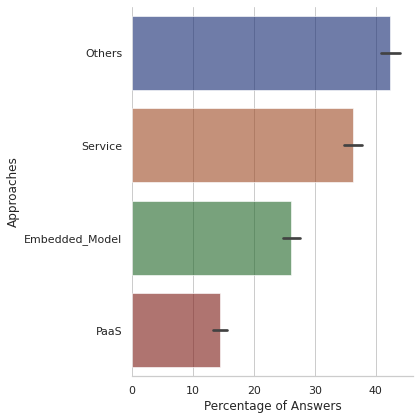

In [19]:
# draw bar plot graphics
d15_plot = sns.catplot(data=bootstrapped_df.sort_values(by=['Value'], ascending = False), 
                      kind="bar", x="Value", y="Approaches", ci="sd", 
                      palette="dark", alpha=.6, height=6)
d15_plot.despine(left=True)
d15_plot.set_axis_labels("Percentage of Answers", "Approaches")